In [4]:
import pandas as pd

og_data = pd.read_csv('creditcard.csv')

In [80]:
import random
data = og_data.copy().sample(n=10000, random_state=random.randint(0, 1000))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175349,122292.0,0.085955,0.291334,0.611489,3.110745,-0.888215,-0.114363,1.159178,-0.242826,-1.475982,...,0.370580,0.960365,0.749778,1.005657,-1.816431,2.518153,0.087279,0.280761,227.10,0
69479,53445.0,1.121548,0.173211,0.433388,1.283572,-0.417190,-0.813467,0.165938,-0.201198,-0.009016,...,0.069251,0.123165,-0.125768,0.395612,0.595911,-0.335569,0.012632,0.034459,60.00,0
189592,128474.0,1.913465,-0.892030,-1.007111,-1.162106,0.263097,1.513907,-0.970719,0.581487,1.741077,...,-0.133515,-0.197846,0.417592,-2.375790,-0.868163,0.528433,0.020689,-0.072297,15.80,0
118792,75215.0,1.214802,0.275480,0.317775,0.580349,-0.349566,-0.757236,-0.046123,-0.032227,-0.162625,...,-0.241446,-0.752301,0.122374,0.277532,0.172272,0.078628,-0.029520,0.019567,0.99,0
175666,122436.0,-0.603695,1.418623,0.638692,-0.121171,0.659367,-1.033076,1.258422,-0.336916,-0.641675,...,0.223059,0.699696,-0.649032,0.007686,0.932361,0.145444,-0.078655,0.073340,16.52,0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# separate the target from the training data
train_X = train.drop('Class', axis=1)
train_y = train['Class']

# separate the target from the testing data
test_X = test.drop('Class', axis=1)
test_y = test['Class']

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix_plot(pred, test):
    # plot confusion matrix
    cm = confusion_matrix(test, pred)

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Normal', 'Fraud'])

In [72]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier

# create the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(train_X, train_y)

# make predictions
pred = knn.predict(test_X)

# evaluate accuracy
acc = accuracy_score(test_y, pred)

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Fraud')]

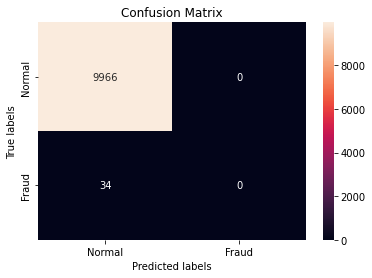

In [23]:
# plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_y, pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Fraud'])
ax.yaxis.set_ticklabels(['Normal', 'Fraud'])

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Fraud')]

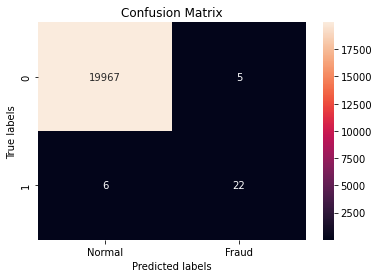

In [74]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create the model
dt = DecisionTreeClassifier()

# fit the model
dt.fit(train_X, train_y)

# make predictions
pred = dt.predict(test_X)

# evaluate accuracy
acc = accuracy_score(test_y, pred)

# confusion matrix
confusion_matrix(test_y, pred)

# plot confusion matrix
cm = confusion_matrix(test_y, pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Fraud'])

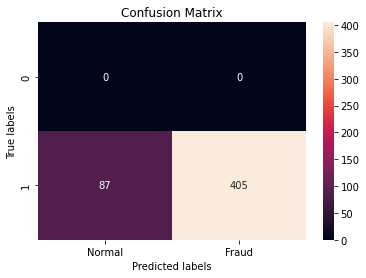

In [77]:
# get all frauds from the og_data
frauds = og_data[og_data['Class'] == 1]
fraud_X = frauds.drop('Class', axis=1)

# run the model on the frauds
fraud_pred = dt.predict(fraud_X)
# get the accuracy of the model on the frauds
fraud_acc = accuracy_score(frauds['Class'], fraud_pred)

# confusion matrix
confusion_matrix_plot(fraud_pred, frauds['Class'])

In [76]:
accuracy_score(frauds['Class'], fraud_pred)

0.823170731707317

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accs = []
for i in range(1, 16):
    data = og_data.copy().sample(n=i * 10000, random_state=random.randint(0, 1000))
    train_X = data.drop('Class', axis=1)
    train_y = data['Class']

    dt = RandomForestClassifier()

    # fit the model
    dt.fit(train_X, train_y)

    # make predictions
    pred = dt.predict(fraud_X)

    # evaluate accuracy
    accs.append(accuracy_score(frauds['Class'], pred))

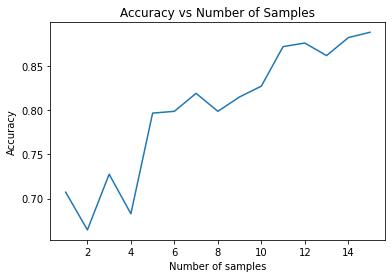

In [85]:

plt.plot(range(1, 16), accs)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Samples')
plt.show()

In [82]:
# random forest classifier

# create the model
rf = RandomForestClassifier()

# fit the model
rf.fit(train_X, train_y)

# make predictions
pred = rf.predict(test_X)

# evaluate accuracy
acc = accuracy_score(test_y, pred)

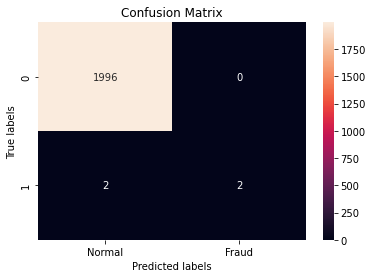

In [83]:
confusion_matrix_plot(pred, test_y)

In [86]:
data = pd.read_csv('citrus.csv')
train_X, test_X, train_y, test_y = train_test_split(data.drop('name', axis=1), data['name'], test_size=0.2, random_state=42)

In [87]:
train_X.shape

(8000, 5)

In [91]:
for clt in [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), RandomForestClassifier()]:
    clt.fit(train_X, train_y)
    pred = clt.predict(test_X)
    print(clt.__class__.__name__, accuracy_score(test_y, pred))
    print(confusion_matrix(test_y, pred))

KNeighborsClassifier 0.919
[[911  77]
 [ 85 927]]
DecisionTreeClassifier 0.942
[[933  55]
 [ 61 951]]
RandomForestClassifier 0.952
[[949  39]
 [ 57 955]]


In [95]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='auto' )
X_res,y_res = nm.fit_resample(og_data.drop('Class', axis=1), og_data['Class'])
nm_under_sample = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

sns.countplot(x='Class', data=nm_under_sample)
plt.title('NearMiss Undersampling')
plt.show()

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (/home/shu7bh/.local/lib/python3.10/site-packages/sklearn/base.py)